# A First Encounter with Machine Learning

Machine Learning (ML for short) is the art of building up and tuning computational algorithms having datasets as entry and mostly concerned about one of the two following tasks:

* Looking into patterns shared by common subsets of individuals.
* Predicting a feature out of the other ones.

*Clustering* and *PCA* (a dimension reduction strategy) fit into the first headline, while *linear regression* or *random forest* fit into the second. 

We'll be going through a couple of ML models in this lecture. Theses models involve a lot of mathematics if worked out in detail. Since this is only an introduction to ML we'll be satisfied with using available models in the `sklearn` library, only giving a broad idea of thoses we encounter.

### Supervised and Unsupervised Learning

Most ML algorithms fit in one of the following headlines: 

* **Supervised Learning: ** it happens when we're looking into predicting a feature out of a number of others. For instance one could try predicting votes of a person out of their address, weight and salary assuming you have a dataset containing all such data including votes. One might also want to guess diameter of oranges depending on the number of sunny days per year, number of windy days including wind direction, average quantity of water used to water the trees. This would mean one has a diary of average orange diameters per year and all other pointed out data. 

* **Unsupervised Learning:** it does happen when you're looking into the inner strucutre of data. What features do people having a specific cancer have in common? What families of writing styles can one find in the late ninties novels? All such questions do not need pre-established and accessible answers. 

### Classification and Regression

In *supervised learning* we've seen into types of different expectations : a *class* or a *float*. In the first case we're interested in classifying individuals. For instance an individual having a gun migh be labelled as a dangerous person ; he is classified in the *dangerous* category. The second case involves having output a *float* for each given entry. This is the case of predicting life expectency out of a number of known features.


### Clustering and Dimensionality Reduction

In *unsupervised learning* we're either trying to lower the number of parameters involved in the model or trying to group up individuals following a pre-established sense of similarity.


### The `scikit-learn` Library

It is the machine learning API available and most widely used in `python`. It's mean features are summed up in the short and nicely written article [here](https://arxiv.org/pdf/1309.0238.pdf).


In [2]:
import sklearn

The `sklearn` classes we'll be interested in are 

* estimators ; classes that train a chosen model and enable prediction on unseen data.
* transformers ; there structure is built on the one of estimators though there use is different, they shall enable us to put data into proper shape to be fed for a chosen model. This is often called *preprocessing*.

For a an overview of the `scikit-learn` library you're encouraged to have a look at the [official scikit-learn webpage](http://scikit-learn.org/stable/).

## Data Science Workflow

Building up an ML model systematically runs through the following steps.

* **Understand what you're looking for.**

Until you're satisfied with the result :

* **Choose a model that would do the job :** start with the simplest get to more complex ones with each iteration.
* **Train it on the data you have.**
* **Evaluate the model prediction capacities :** depending on whether supervised or unsupervised learning you'll be doing different things here. In the case of supervised learning (which is the one we'll be mostly dealing with) you'll be testing your model prediction capacities on data entries it did not see while training. That the reason why you're going to isolate part of your data for testing as soon a you get the data in hand.



Rather than going through a more in-depth discussion about what ML is and how to do it we're going to go through an explicit example. 

## Handwritten Digits Recognition

Let's first fetch the data from available `sklearn` datasets.

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home="./datasets")

In [2]:
fetch_mldata?

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

The *MNIST* dataset is one containing $70,000$ vectorized images of handwritten digits by high-schoolers and employees in the US. Aim is to decide on the number an image represents. 

`target` here is a vector of length $70,000$ corresponding the number same index image represents.

In [4]:
mnist.target.shape, mnist.data.shape

((70000,), (70000, 784))

Number of of features of dataset corresponds to the number of pixels in a $28\times 28$ image.

In [5]:
28*28

784

 Let's extract entries and output.

In [6]:
X, y = mnist["data"], mnist["target"]

To have an idea of what the images look like we can plot them out of their serialization.

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
def show_image(serial):
    image = serial.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
    
    plt.axis("off")
    plt.show()

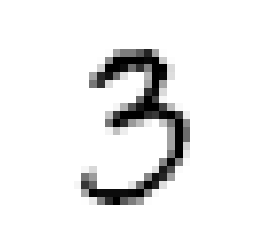

In [9]:
digit_3 = X[20000]
show_image(digit_3)

### Split Dataset Into Training and Testing Dataset

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

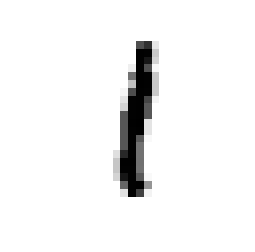

In [11]:
show_image(X_train[20000])

In [12]:
train_test_split?

Can you understand what has just happened? **Any idea as to why?**

### Making Clear What We Are Going To Do

We are going to train a *binary classifier* enabling us to check whether an image is a $3$ or not. Answer is thus a boolean and entry is still same.

In [13]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [14]:
y_train_3[:100].sum(0)

7

### Choosing Model

Among the simplest models for classification is logistic regression. It's said to be a linear model. We shall try out this one first.

In [15]:
from sklearn.linear_model import LogisticRegression

In [18]:
LogisticRegression?

This is a python class. It has to be instatiated first before training or using it for prediction. It belong to the class of estimators in `sklearn`. The ones we'll see will always share the methods :

* **fit :** Fits the model to the data given checking using training dataset.
* **predict :** Once trained the model can predict answer for new values (and might be wrong sometimes).

In [ ]:
log_model = LogisticRegression()

### Training Your Model

In [ ]:
log_model.fit(X_train, y_train_3)

### Prediction and Evaluation

In [16]:
import numpy as np

In [ ]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
A.shape

In [ ]:
A.reshape(2, 5)

In [ ]:
A

In [ ]:
A.reshape(2, -1)

In [ ]:
A.reshape(-1, 2)

In [ ]:
log_model.predict(digit_3.reshape(1, -1))

As one can see the example we've taken was well classified by the model. This not enough for evaluation though. The least we could ask for is that the proportion of errors on test set would be low enough.

In [25]:
from sklearn.metrics import accuracy_score

In [ ]:
y_predict_3 = log_model.predict(X_test)

In [ ]:
accuracy_score(y_test_3, y_predict_3)

A score which looks rather high, before going further let's stop to look a minute for the proportion of $3$ in the dataset.

In [ ]:
(y == 3).sum(0)/y.shape[0]*100

The proportion of $3$s in the dataset is only $10\%$. Which means a model only returning `False` has already $90\%$ accuracy.

In [ ]:
from sklearn.base import BaseEstimator

class Never3Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_3_clf = Never3Classifier()
accuracy_score(y_test_3, never_3_clf.predict(X_test))

This enables us to put in perspective the high result we got for the `logistic regression` model. To get even further one can use `cross validation` in order to check accuracy of model on different portions of the dataset. 

One cuts training set into $k$ parts, trains iteratively on $k-1$ parts and tests it against the last $k$ part. 

In [24]:
from sklearn.model_selection import cross_val_score

There is an important statistical issue under the cross validation strategy : you better choose a number of folds that is too small to have very different statistical features among them. Otherwise one will need to get hands a little dirty to do better.

## Getting to Multi-class Prediction

### A More Evolved Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
forest_clf = RandomForestClassifier()

In [20]:
forest_clf.fit(X_train, y_train_3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [21]:
forest_predict_3 = forest_clf.predict(X_test)

In [26]:
accuracy_score(forest_predict_3, y_test_3)

0.98121428571428571

In [27]:
cross_val_score(forest_clf, X_train, y_train_3, cv=3, scoring='accuracy')

array([ 0.97621598,  0.97562413,  0.97771349])

## Multi-class classification

In [28]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [29]:
forest_clf.predict(digit_3.reshape(1, -1))

array([ 3.])

In [30]:
forest_clf.predict(X[40000].reshape(1, -1))

array([ 6.])

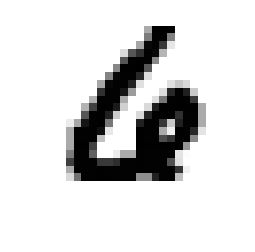

(None, 6.0)

In [31]:
show_image(X[40000]), y[40000]

In [34]:
y_test_pred = forest_clf.predict(X_test)

In [35]:
accuracy_score(y_test_pred, y_test)

0.94799999999999995

In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [43]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5431,    3,   25,   11,    4,   11,   25,    4,   29,    2],
       [   1, 6261,   38,   13,    6,   11,    7,   15,    8,    6],
       [  50,   21, 5324,   36,   37,   11,   24,   44,   49,   12],
       [  24,   24,  147, 5209,    5,  130,   12,   54,   83,   28],
       [  22,   16,   31,    5, 5154,    5,   33,   22,   21,  131],
       [  46,   18,   17,  199,   22, 4524,   56,   11,   44,   34],
       [  42,   17,   24,    4,   23,   64, 5342,    0,   20,    1],
       [  15,   40,   87,   28,   52,    3,    2, 5464,   16,   86],
       [  31,   61,   86,  128,   61,   96,   34,   15, 4899,   67],
       [  37,   19,   27,   83,  160,   41,    5,   74,   58, 5042]])

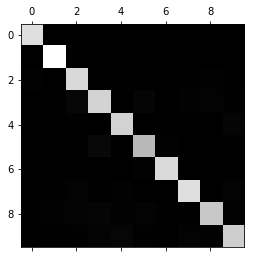

In [44]:
plt.matshow(conf_mx, cmap=plt.cm.gray)  # image is better
plt.show()

In [45]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

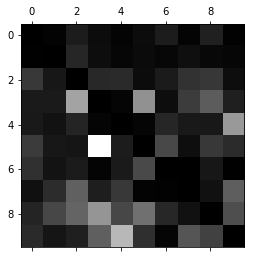

In [46]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()